In [1]:
!which python 

/home/bachtung/miniconda3/envs/p4ds-env/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
point_df = pd.read_csv('diemthi2019_update.csv') 
point_df.head()

,Unnamed: 0,SBD,Ngu Van,Toan Hoc,Ma Ngoai Ngu,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
0,0,24008611,8.00,8.2,N1,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,1,51000032,6.17,8.6,N1,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2,51000005,4.75,5.2,NaN,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,3,51000021,4.50,4.4,NaN,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,4,51000013,6.00,5.8,N1,4.4,NaN,NaN,NaN,7.75,8.25,7.50


In [4]:
point_df = point_df[['SBD', 'Toan Hoc', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc']]
point_df.head()

,SBD,Toan Hoc,Vat Ly,Hoa Hoc,Sinh Hoc
0,24008611,8.2,NaN,NaN,NaN
1,51000032,8.6,8.25,4.5,6.0
2,51000005,5.2,NaN,NaN,NaN
3,51000021,4.4,NaN,NaN,NaN
4,51000013,5.8,NaN,NaN,NaN


**có bao nhiêu dòng và cột**

In [5]:
num_cols_point = point_df.shape[1]
num_rows_point = point_df.shape[0]

Một dòng là set điểm của một học sinh khóa 2019. Có vẻ không có dòng nào là bị lặp

In [6]:
have_duplicated = point_df.duplicated().any()

- **SBD**: số báo danh của thí sinh.
- **Toán Học**: điểm thi môn toán.
- **Vật Lý**: điểm thi môn Vật Lý.
- **Hóa Học**: điểm thi môn Hóa.
- **Sinh học** điểm thi môn Sinh.

In [7]:
cols_dtype = pd.Series(data=point_df.dtypes, index=point_df.columns)
cols_dtype

SBD           int64
Toan Hoc    float64
Vat Ly      float64
Hoa Hoc     float64
Sinh Hoc    float64
dtype: object

tìm tỷ lệ giá trị thiếu, min, max của các cột numeric

In [8]:
index = ['missing_ratio', 'min', 'max']
nume_columns = ['Toan Hoc', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc']
nume_col_profile_df = pd.DataFrame(index = index, columns = nume_columns)
nume_col_profile_df = nume_col_profile_df.fillna(0)
nume_col_profile_df.iloc[0,:] = (point_df[nume_columns[:]].isna().sum() / num_rows_point) *100
nume_col_profile_df.iloc[1,:] = point_df[nume_columns[:]].min()
nume_col_profile_df.iloc[2,:] = point_df[nume_columns[:]].max()

tỉ lệ thiếu các môn tự nhiên

<AxesSubplot:>

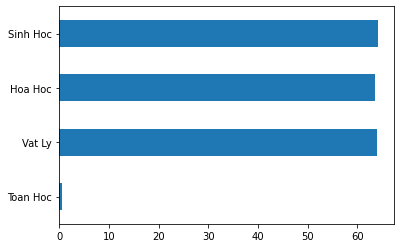

In [9]:
nume_col_profile_df.loc['missing_ratio'].plot.barh()

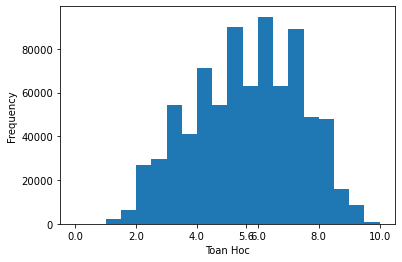

In [10]:
th_series = point_df["Toan Hoc"]
th_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(th_series.mean(),1)])
plt.xlabel("Toan Hoc")
plt.show()

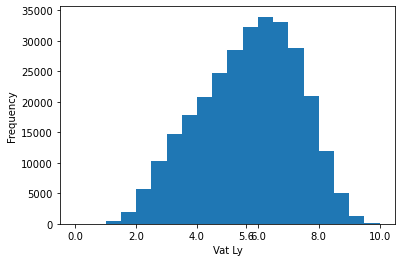

In [11]:
vl_series = point_df["Vat Ly"]
vl_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(vl_series.mean(),1)])
plt.xlabel("Vat Ly")
plt.show()

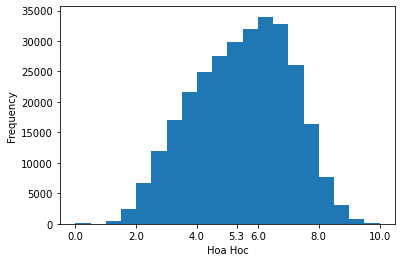

In [12]:
hh_series = point_df["Hoa Hoc"]
hh_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(hh_series.mean(),1)])
plt.xlabel("Hoa Hoc")
plt.show()

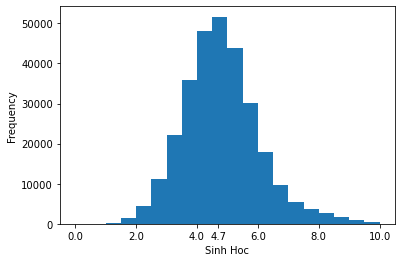

In [13]:
sh_series = point_df["Sinh Hoc"]
sh_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(sh_series.mean(),1)])
plt.xlabel("Sinh Hoc")
plt.show()